<a href="https://colab.research.google.com/github/dasyncopator/ECE-363N-ME-379N-Engineering-Acoustics/blob/main/Single_Panel_Transmission_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

In [ ]:
P_plus = 1
m = 12
A = 100
rho = 1.225
c = 343
z = rho*c

# Frequency vector
f = np.linspace(20, 20e3, 10000)

In [ ]:
# Tanay's solution (method 1)
def P_tr_i_1(f_i):
  w_i = 2*pi*f_i
  A1 = np.array([[1, -complex(1, ((m*w_i) / z))], 
                 [1, 1]], dtype = np.complex_)
  b1 = np.array([-P_plus, P_plus])
  x1 = np.linalg.solve(A1, b1) # Detects dimension of b, no need to take transpose
  P_tr_i_1 = x1[1]
  return P_tr_i_1

# Zihuan's solution (method 2)
def P_tr_i_2(f_i):
  w_i = 2*pi*f_i
  A2 = np.array([[1, -1, complex(0, -w_i*m)],
                 [0, 1, -z],
                 [1, 0, z]], dtype = np.complex_)
  b2 = np.array([-P_plus, 0, P_plus])
  x2 = np.linalg.solve(A2, b2) # Detects dimension of b, no need to take transpose
  P_tr_i_2 = x2[1]
  return P_tr_i_2

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


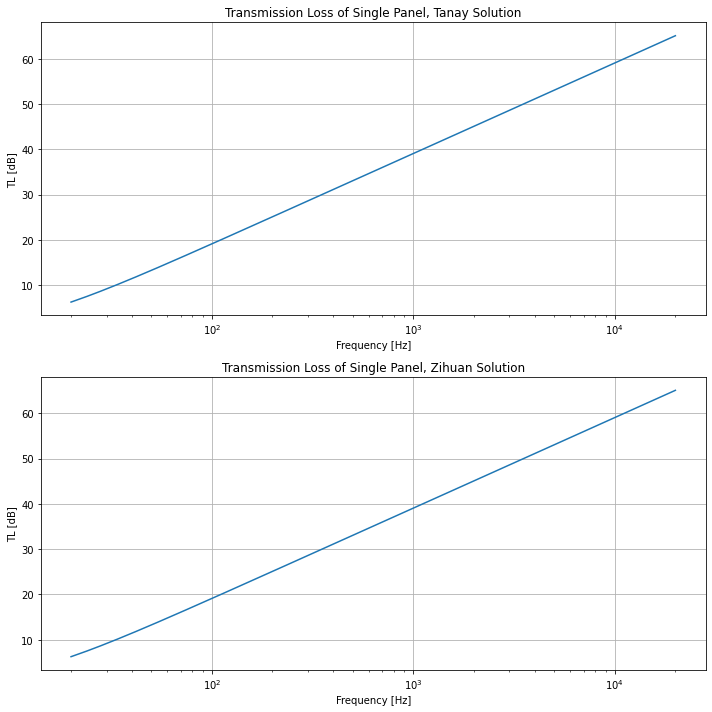

In [ ]:
# Tanay's solution
P_tr_1 = np.vectorize(P_tr_i_1)
P_trs_1 = P_tr_1(f)
T1 = P_trs_1 / P_plus
TL1 = 20*np.log10(1 / T1)

# Zihuan's solution
P_tr_2 = np.vectorize(P_tr_i_2)
P_trs_2 = P_tr_2(f)
T2 = P_trs_2 / P_plus
TL2 = 20*np.log10(1 / T2)

fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].plot(f, TL1)
ax[0].set_xscale('log')
ax[0].grid()
ax[0].set_title('Transmission Loss of Single Panel, Tanay Solution')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('TL [dB]')

ax[1].plot(f, TL2)
ax[1].set_xscale('log')
ax[1].grid()
ax[1].set_title('Transmission Loss of Single Panel, Zihuan Solution')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('TL [dB]')

fig.tight_layout()

Tanay Mannikar, Zihuan Liu: ECE 363N/ME 379N Engineering Acoustics, Fall 2022